In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold



from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, zero_one_loss, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn import svm

from sklearn.feature_selection import SelectPercentile

from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, SGDRegressor, LinearRegression

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_A.csv' # содержит только имя файла, без имен папок

In [6]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [7]:
df_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [8]:
# НАЗВАНИЯ ОСТАВШИХСЯ КОЛОНОК: '2', '3', '4', '5', '6', '7', '12', '13', '14', '16', '17', '23', '25'

In [9]:
columns_to_drop = ['1', '8', '21', '20', '28', '0', '24', '22', '10', '15', '27', '9', '18', '26', '11', '19']
df_train = df_train.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)
df_train

,price,2,3,4,5,6,7,12,13,14,16,17,23,25
0,5320000,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.929397,1.517692,-0.142607,1.472618,-0.280781,-0.219265,-0.126718
1,3465000,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.929397,-0.805741,0.307755,-0.679063,1.311928,-0.219265,-0.126718
2,3500000,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,0.224410,-0.805741,-1.033235,-0.679063,0.470806,-0.219265,-0.126718
3,3570000,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,-0.929397,-0.805741,-1.119627,-0.679063,-1.039726,-0.219265,0.417348
4,4130000,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,0.224410,-0.805741,0.232269,1.472618,1.747297,-0.219265,-0.108582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,0.224410,-0.805741,2.948326,1.472618,1.491291,-0.219265,-0.126718
404,5250000,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,0.224410,0.355976,1.138751,-0.679063,-0.269301,-0.219265,-0.126718
405,5950000,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.929397,1.517692,-0.653206,-0.679063,-1.273605,-0.219265,-0.126718
406,4319000,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,-0.929397,-0.805741,0.330239,-0.679063,1.109630,-0.219265,0.195188


In [10]:
df_target=df_train['price']
df_data=df_train.drop('price', axis=1)
random_seed=53
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, random_state=random_seed)

In [11]:
df_test

,2,3,4,5,6,7,12,13,14,16,17,23,25
0,0.931702,1.196496,-0.223185,-0.734539,0.488647,-0.570187,2.532024,-0.805741,0.294621,1.472618,-1.203803,-0.219265,0.785727
1,0.788580,-1.263275,1.472449,1.361397,0.391790,3.413810,0.224410,1.517692,-0.634672,-0.679063,0.530364,4.560702,0.666712
2,0.384500,-1.127236,-0.223185,-0.734539,-1.303204,-0.570187,0.224410,-0.805741,-0.929597,-0.679063,-0.574417,-0.219265,-0.126718
3,0.642224,-1.519809,-0.223185,1.361397,1.169412,-0.570187,-0.929397,-0.805741,-0.754375,-0.679063,-0.937064,4.560702,-0.126718
4,0.348662,-0.943795,-0.223185,-0.734539,-0.486840,-0.570187,-0.929397,1.517692,0.628778,-0.679063,1.396914,-0.219265,0.159484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.037632,-1.153273,0.624632,-0.734539,0.391790,1.421812,2.532024,0.355976,-0.725904,1.472618,1.633640,-0.219265,0.666712
133,0.458546,0.471874,-0.223185,-0.734539,-0.341555,-0.570187,-0.929397,0.355976,-1.248529,-0.679063,-1.424502,-0.219265,-0.019038
134,-0.525244,-1.760731,-0.223185,-0.734539,0.336443,-0.570187,-0.929397,-0.805741,0.575127,-0.679063,-1.386457,-0.219265,-0.852140
135,-0.861678,-0.642180,-0.223185,-0.734539,-0.300045,-0.570187,0.224410,0.355976,-0.149375,-0.679063,0.821972,4.560702,-0.070044


In [12]:
# Блок(и) обучения и поверки модели

In [13]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

p = np.arange(1,5)
n_neighbors = [2,5,10,20,50,100]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()]
#weights = ['uniform','distance'] weights=distance использовать не буду, т.к с ним score train=1, т.е идет переобучение
param_grid = {
    'preprocessing': scaling,
    'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': n_neighbors,
    'regressor__p': p,
}


grid = RandomizedSearchCV(pipe,param_grid, cv=kfold,verbose=4,return_train_score=True)
grid.fit(X_train,y_train)
grid

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END preprocessing=RobustScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=5, regressor__p=1;, score=(train=0.657, test=0.417) total time=   0.0s
[CV 2/5] END preprocessing=RobustScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=5, regressor__p=1;, score=(train=0.606, test=0.437) total time=   0.0s
[CV 3/5] END preprocessing=RobustScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=5, regressor__p=1;, score=(train=0.570, test=0.548) total time=   0.0s
[CV 4/5] END preprocessing=RobustScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=5, regressor__p=1;, score=(train=0.698, test=0.129) total time=   0.0s
[CV 5/5] END preprocessing=RobustScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=5, regressor__p=1;, score=(train=0.602, test=0.378) total time=   0.0s
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('regressor',
                                              KNeighborsRegressor())]),
                   param_distributions={'preprocessing': [MinMaxScaler(),
                                                          StandardScaler(),
                                                          RobustScaler()],
                                        'regressor': [KNeighborsRegressor()],
                                        'regressor__n_neighbors': [2, 5, 10, 20,
                                                                   50, 100],
                                        'regressor__p': array([1, 2, 3, 4])},
                   return_train_score=True, verbose=4)

In [14]:
knn_pr = grid.predict(X_test)
mape = mean_absolute_percentage_error(y_test, knn_pr)
print(grid.best_params_)
print(grid.best_score_)
mape

{'regressor__p': 1, 'regressor__n_neighbors': 5, 'regressor': KNeighborsRegressor(), 'preprocessing': RobustScaler()}
0.38174676575868116


0.2031137177895834

In [15]:
# Блок предсказания с использованием тестового набора

In [16]:
model =  Pipeline([
            ('preprocessing', StandardScaler()), 
            ('regressor',     KNeighborsRegressor(n_neighbors=5, p=4))
            ])
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5225200736278155


In [17]:
prediction = model.predict(df_test)

In [18]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = prediction
y_predict

array([6482000., 5859000., 3129000., 4991000., 3346000., 2912000.,
       7636188., 6944000., 3409000., 5005000., 7273000., 3500000.,
       4347000., 3592400., 3717000., 8302000., 4018000., 7000000.,
       4809700., 6888000., 4279800., 4305000., 5698000., 4081000.,
       4720800., 4240600., 5523700., 3703000., 3127600., 3437000.,
       3179400., 5532800., 4758600., 3437000., 6048700., 3339000.,
       3514000., 4613000., 4130000., 5748400., 7537600., 4095000.,
       7656600., 6636000., 3101000., 5999000., 6004600., 4233600.,
       5152000., 3675000., 4977000., 3175200., 7342188., 3458000.,
       2646000., 3675000., 4431000., 3959200., 2614430., 4223800.,
       9051000., 3724000., 4327400., 3360000., 7154000., 5971000.,
       3897600., 3437000., 3458000., 7546000., 3234000., 4898600.,
       3630200., 7070000., 6585600., 4711000., 5262600., 7007000.,
       5306000., 4541600., 4921700., 5831000., 7860188., 6950188.,
       5184200., 2828000., 4641700., 3299800., 3325000., 33740

In [19]:
# НАЗВАНИЯ ОСТАВШИХСЯ КОЛОНОК: '2', '3', '4', '5', '6', '7', '12', '13', '14', '16', '17', '23', '25'

In [20]:
df_test.columns.values

array(['2', '3', '4', '5', '6', '7', '12', '13', '14', '16', '17', '23',
       '25'], dtype=object)

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,033,000
 
----------------------
   MAPE Error: 22.78
----------------------


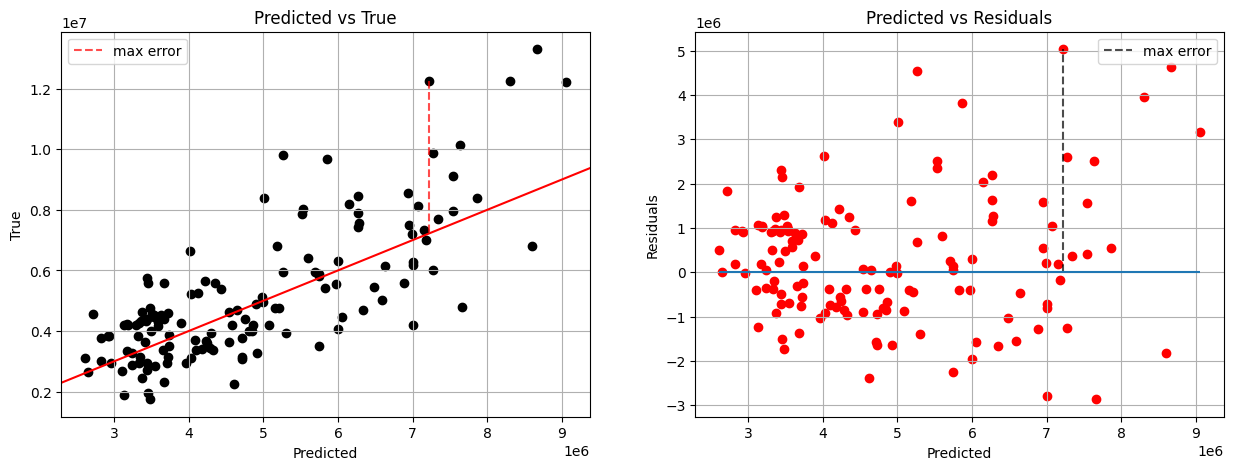

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [23]:
mask = df_test.columns.values

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
